# Supervised Learning

Use pydataset for datasets.

In [5]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### Regression vs. Classification

See linear regression and logistic regression respectively for examples.

### Linear Regression

Based off [this example](https://youtu.be/b0L47BeklTE), but implementing my own linear regression.

In [23]:
pima = data("Pima.tr")
print (pima)
# we will use skin (tricep skinfold measurements) to predict BMI

     npreg  glu  bp  skin   bmi    ped  age type
1        5   86  68    28  30.2  0.364   24   No
2        7  195  70    33  25.1  0.163   55  Yes
3        5   77  82    41  35.8  0.156   35   No
4        0  165  76    43  47.9  0.259   26   No
5        0  107  60    25  26.4  0.133   23   No
..     ...  ...  ..   ...   ...    ...  ...  ...
196      2  141  58    34  25.4  0.699   24   No
197      7  129  68    49  38.5  0.439   43  Yes
198      0  106  70    37  39.4  0.605   22   No
199      1  118  58    36  33.3  0.261   23   No
200      8  155  62    26  34.0  0.543   46  Yes

[200 rows x 8 columns]


<AxesSubplot:xlabel='skin', ylabel='bmi'>

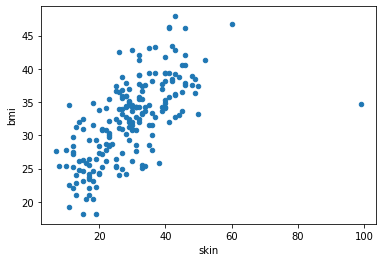

In [24]:
pima.plot(kind="scatter", x="skin", y="bmi")

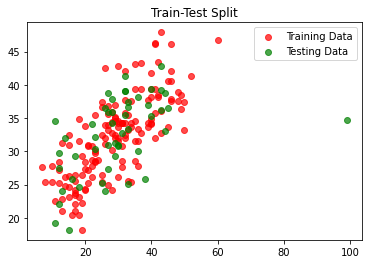

In [25]:
x_train, x_test, y_train, y_test = train_test_split(pima.skin, pima.bmi)

plt.scatter(x_train, y_train, label="Training Data", color="r", alpha=0.7)
plt.scatter(x_test, y_test, label="Testing Data", color="g", alpha=0.7)
plt.legend()
plt.title("Train-Test Split")
plt.show()

Here we do our own implementation of linear regression with gradient descent.

In [27]:
epochs = 1000
m = 0.
b = 0.
lr = 0.001

x_train_np = np.array(x_train, dtype=float)
y_train_np = np.array(y_train, dtype=float)

for _ in range(epochs):
    # vectorized
    # partial wrt m
    partial_m = -2./x_train.shape[0] * np.sum( x_train_np * (y_train_np - (m * x_train_np + b)) )
    # partial wrt b
    partial_b = -2./x_train.shape[0] * np.sum( y_train_np - (m * x_train_np + b) )
    
    # update
    m -= lr * partial_m
    b -= lr * partial_b
    
print (m, b)

0.8947979331931288 4.378016909048256


Compare predictions to true values.

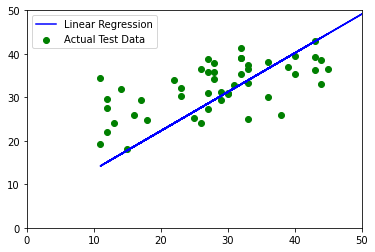

In [32]:
x_test_np = np.array(x_test, dtype=float)
preds = m * x_test_np + b

plt.plot(x_test, preds, label="Linear Regression", color="b")
plt.scatter(x_test, y_test, label="Actual Test Data", color="g")
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.show()

### Logistic Regression

This time, from scratch based off [this video](https://youtu.be/VK6v9Ure8Lk).

In [55]:
titanic = data("titanic")
titanic.sample(5)

,class,age,sex,survived
937,3rd class,adults,man,no
287,1st class,adults,women,yes
658,3rd class,adults,man,yes
543,2nd class,adults,women,yes
656,3rd class,adults,man,yes


In [56]:
# feature engineering (one hot encoding)
titanic = pd.get_dummies(titanic, drop_first=True) 
# drop first because if you aren't a child you must be an adult, etc.
titanic.sample(5)

,class_2nd class,class_3rd class,age_child,sex_women,survived_yes
419,1,0,0,0,0
198,0,0,0,1,1
75,0,0,0,0,0
1056,0,1,0,0,0
1225,0,1,0,1,0


In [57]:
x_train, x_test, y_train, y_test = train_test_split(titanic.drop("survived_yes", axis=1), titanic["survived_yes"])

Implement our own logistic regression.

In [60]:
epochs = 1000
W = np.zeros((4,1))
b = 0.
lr = 0.001

x_train_np = np.array(x_train, dtype=int)
y_train_np = np.array(y_train, dtype=int)
x_test_np = np.array(x_test, dtype=int)

def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

X = x_train_np.T
Y = y_train_np.reshape(1,-1)
for _ in range(epochs):
    # vectorized
    # predict
    A = sigmoid(np.dot(W.T, X) + b)
    # derivatives
    dW = np.dot((A - Y), X.T)
    db = np.sum(A - Y)
    
    # update
    W -= lr * dW.T
    b -= lr * db

Prediction accuracy

In [68]:
X = x_test_np.T
preds = np.array(list(map(lambda x: x > 0.5, sigmoid(np.dot(W.T, X) + b)[0])), dtype=int)


total = 0
right = 0
y_test_np = np.array(y_test, dtype=int)
for i in range(preds.shape[0]):
    if preds[i] == y_test_np[i]:
        right += 1
    total += 1
print (right/total)

0.7689969604863222


In [69]:
# not positive derivatives are right... divide by error? double check